#About Dataset
link https://www.kaggle.com/datasets/jsphyg/tipping

Ever wonder how much to tip your waiter? One dedicated waiter meticulously recorded information about each tip he received over a few months while working at a restaurant. In total, he documented 244 tips. Now, the challenge is: can you predict the tip amount?

Stacking and ensembling techniques seem to work wonders with this dataset!

NOTE **this dataset is for EDA**

###Imports

In [1]:
import pandas as pd

##Load the data set

In [2]:
df = pd.read_csv("tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#Exploring the data

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.isna().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [5]:
df.duplicated().sum()

np.int64(1)

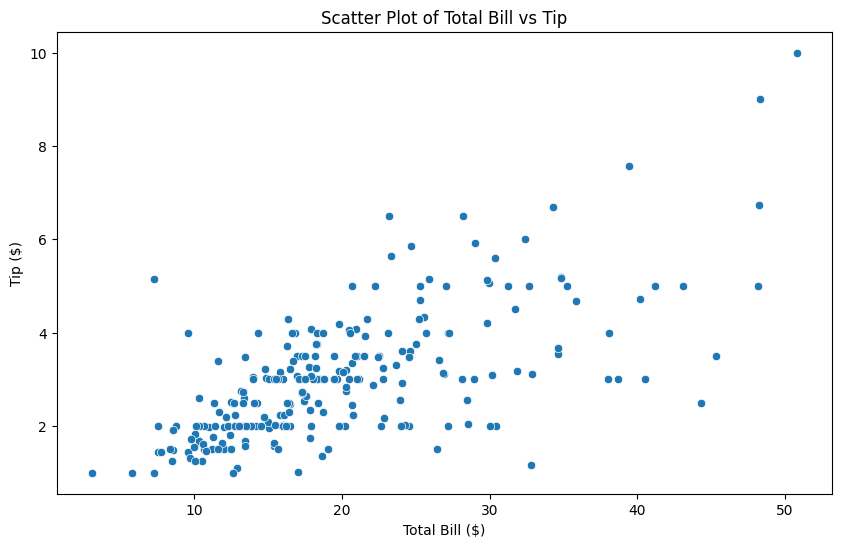

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Scatter Plot of Total Bill vs Tip')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.show()

##Preprocessing

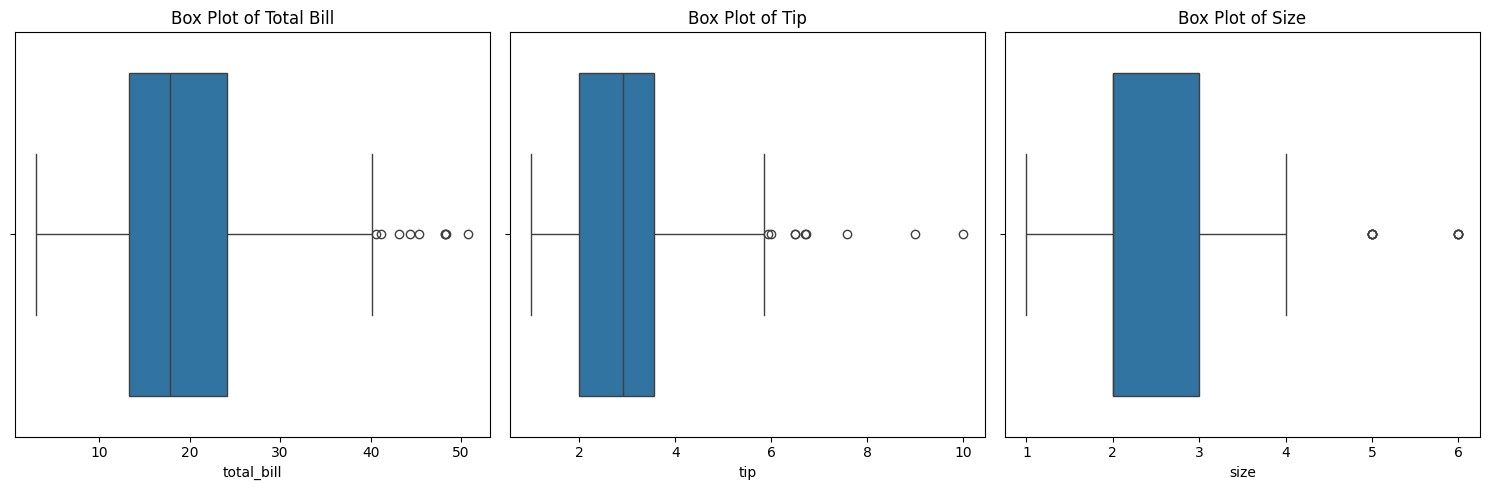

In [12]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='total_bill', data=df)
plt.title('Box Plot of Total Bill')

plt.subplot(1, 3, 2)
sns.boxplot(x='tip', data=df)
plt.title('Box Plot of Tip')

plt.subplot(1, 3, 3)
sns.boxplot(x='size', data=df)
plt.title('Box Plot of Size')

plt.tight_layout()
plt.show()

In [11]:
Q1 = df[['total_bill', 'tip', 'size']].quantile(0.25)
Q3 = df[['total_bill', 'tip', 'size']].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[~((df[['total_bill', 'tip', 'size']] < (Q1 - 1.5 * IQR)) | (df[['total_bill', 'tip', 'size']] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Shape of original dataframe:", df.shape)
print("Shape of dataframe after removing outliers:", df_no_outliers.shape)

Shape of original dataframe: (244, 7)
Shape of dataframe after removing outliers: (223, 7)


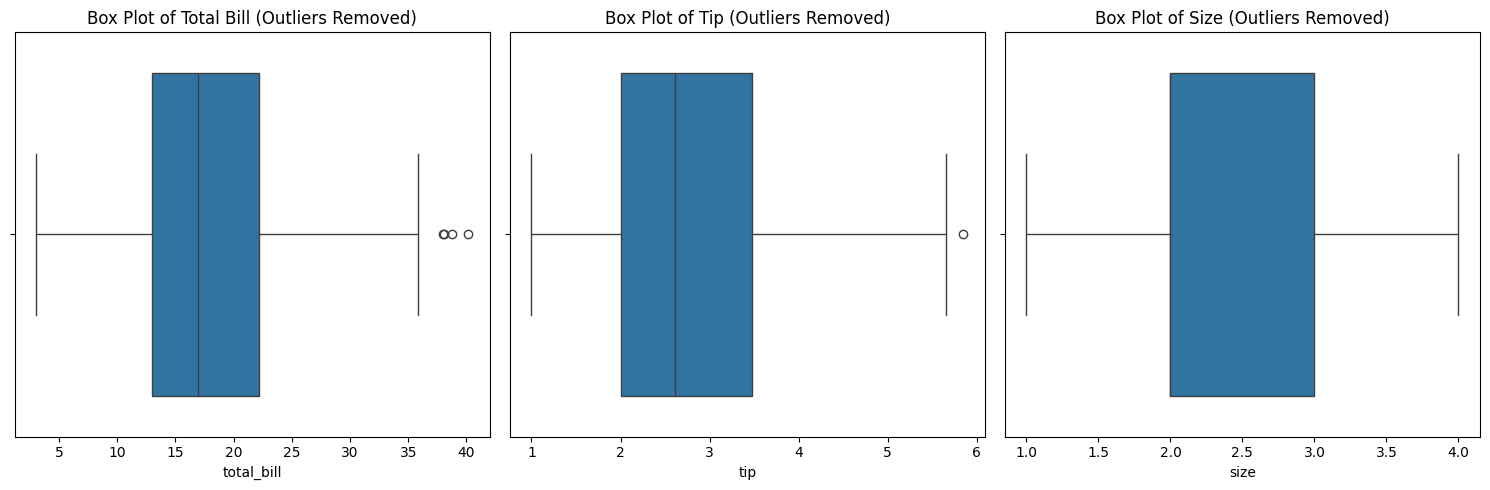

In [13]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='total_bill', data=df_no_outliers)
plt.title('Box Plot of Total Bill (Outliers Removed)')

plt.subplot(1, 3, 2)
sns.boxplot(x='tip', data=df_no_outliers)
plt.title('Box Plot of Tip (Outliers Removed)')

plt.subplot(1, 3, 3)
sns.boxplot(x='size', data=df_no_outliers)
plt.title('Box Plot of Size (Outliers Removed)')

plt.tight_layout()
plt.show()

In [15]:
df['day'].value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


In [21]:
df['day'] = df['day'].replace({"Sat":0,"Sun":1,"Thur":2,"Fri":3})

In [22]:
df['smoker'].value_counts()

,count
smoker,
1,151
0,93


In [23]:
df['smoker'] = df['smoker'].replace({"Yes":0,"No":1})

In [19]:
df['sex'].value_counts()

,count
sex,
Male,157
Female,87


In [24]:
df['sex'] = df['sex'].replace({"Male":0,"Female":1})

/tmp/ipython-input-1026469915.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({"Male":0,"Female":1})


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int64  
 3   smoker      244 non-null    int64  
 4   day         244 non-null    int64  
 5   time        244 non-null    int64  
 6   size        244 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 13.5 KB


In [26]:
df['time'].value_counts()

,count
time,
Dinner,176
Lunch,68


In [27]:
df['time'] = df['time'].replace({"Dinner":0,"Lunch":1})

/tmp/ipython-input-2479473279.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['time'] = df['time'].replace({"Dinner":0,"Lunch":1})


### Define x and y

In [29]:
X = df.drop('tip', axis=1)
y = df['tip']

## Split the data


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model


In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predict on the test set


In [33]:
y_pred = model.predict(X_test)

## Evaluate the model

In [34]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

R-squared: 0.44
Mean Squared Error: 0.70


## Check for overfitting


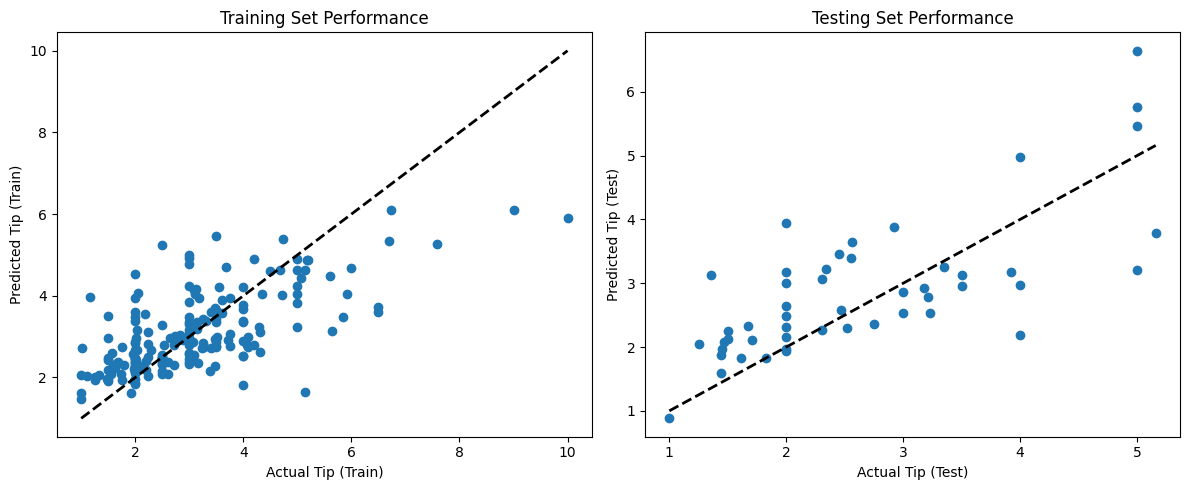

In [35]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, model.predict(X_train))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual Tip (Train)')
plt.ylabel('Predicted Tip (Train)')
plt.title('Training Set Performance')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Tip (Test)')
plt.ylabel('Predicted Tip (Test)')
plt.title('Testing Set Performance')

plt.tight_layout()
plt.show()